# Learning Rate Grid Search Analysis

This notebook can be used after running `$ bash loop-lr-only.sh` or `$ bash loop-all.sh` a number of times.
Those scripts make repeated calls to another script that trains a simple classifier on the FashionMNIST dataset with different learning rates and learning rate schedules.
Be sure to update the `base_path = ` cell below as appropriate, based on whether you ran `loop-lr-only.sh` or `loop-all.sh`.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from sconce.monitors import DataframeMonitor

In [2]:
base_path = 'lr-only'

In [3]:
csv_filename = os.path.join(base_path, 'results.csv')
df = pd.read_csv(csv_filename, delimiter='\t')

In [4]:
means = df.pivot_table(values='acc', index=['rate_schedule', 'initial_learning_rate'])
means = means.swaplevel().unstack()

stds = df.pivot_table(values='acc', index=['rate_schedule', 'initial_learning_rate'], aggfunc=np.std)
stds = stds.swaplevel().unstack()

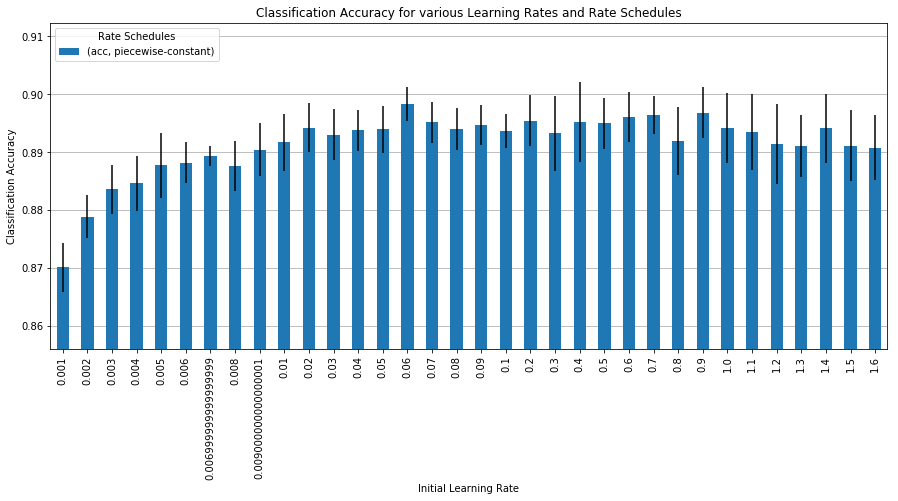

In [5]:
tmeans = means
tstds = stds

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

tmeans.plot(kind='bar', ax=ax, yerr=tstds)

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylabel("Classification Accuracy")
ax.set_xlabel("Initial Learning Rate")
legend = ax.legend(loc='upper left')
legend.set_title('Rate Schedules')
ax.set_title("Classification Accuracy for various Learning Rates and Rate Schedules")

ymin = tmeans.min().min()
ymax = tmeans.max().max()
yrange = ymax - ymin
ylow = ymin - 0.5 * yrange
yhigh = ymax + 0.5 * yrange
ax.set_ylim(ylow, yhigh);

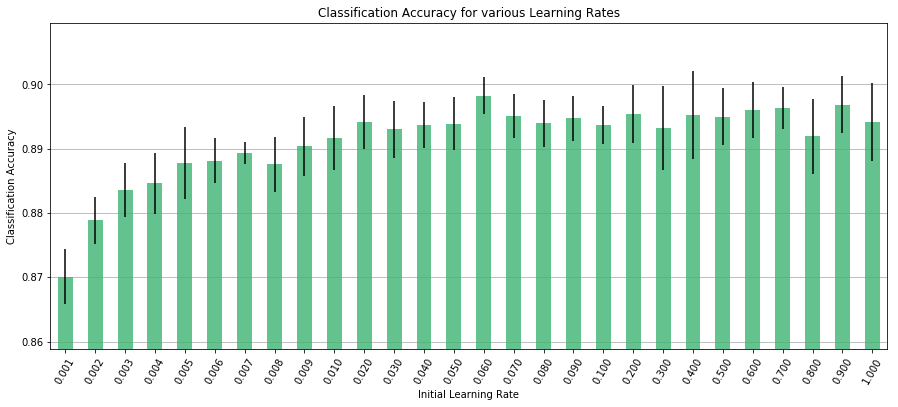

In [6]:
tmeans = means.iloc[:-6][('acc', 'piecewise-constant')]
tstds = stds.iloc[:-6][('acc', 'piecewise-constant')]

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

tmeans.plot(kind='bar', ax=ax, yerr=tstds, color='mediumseagreen', alpha=0.8)

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylabel("Classification Accuracy")
ax.set_xlabel("Initial Learning Rate")
ax.set_title("Classification Accuracy for various Learning Rates")

ymin = tmeans.min().min()
ymax = tmeans.max().max()
yrange = ymax - ymin
ylow = ymin - 0.4 * yrange
yhigh = ymax + 0.4 * yrange
ax.set_ylim(ylow, yhigh)

# fix 0.007 being rendered as 0.006999999999999999
labels = ['%1.3f' % float(x.get_text()) for x in ax.get_xticklabels()]
ax.set_xticklabels(labels=labels)
ax.xaxis.set_tick_params(rotation=60);

In [7]:
monitors_filename = os.path.join(base_path, 'monitors.hd5')
with pd.HDFStore(monitors_filename) as store:
    keys = store.keys()
    
values = []
for key in keys:
    monitor = DataframeMonitor.from_file(monitors_filename, key=key)
    _, _, rate, run_id = key.split('-')
    value = {'id': run_id, 'steps': len(monitor.df), 'rate': rate}
    values.append(value)

In [8]:
values_df = pd.DataFrame(values).set_index('id')

steps_means = values_df.pivot_table(values='steps', index=['rate'])
steps_stds = values_df.pivot_table(values='steps', index=['rate'], aggfunc=np.std)

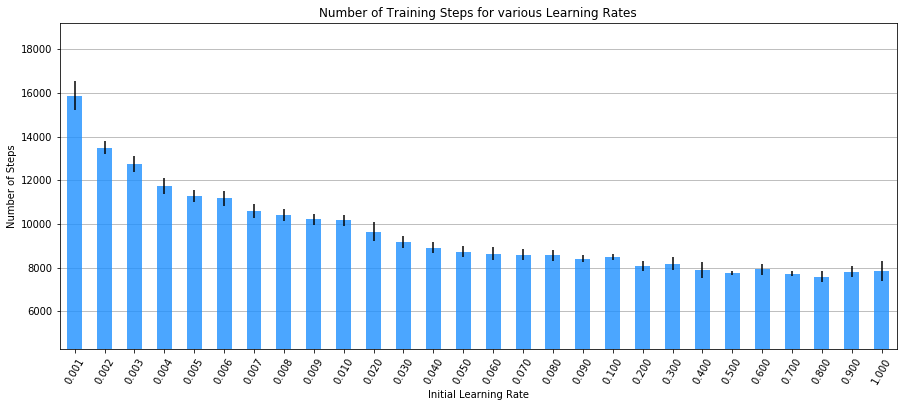

In [9]:
tmeans = steps_means.iloc[:-6]
tstds = steps_stds.iloc[:-6]

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

tmeans.plot(kind='bar', ax=ax, yerr=tstds, color='dodgerblue', alpha=0.8)

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylabel("Number of Steps")
ax.set_xlabel("Initial Learning Rate")
ax.set_title("Number of Training Steps for various Learning Rates")

ymin = tmeans.min().min()
ymax = tmeans.max().max()
yrange = ymax - ymin
ylow = ymin - 0.4 * yrange
yhigh = ymax + 0.4 * yrange
ax.set_ylim(ylow, yhigh)

# fix 0.007 being rendered as 0.006999999999999999
labels = ['%1.3f' % float(x.get_text()) for x in ax.get_xticklabels()]
ax.set_xticklabels(labels=labels)
ax.xaxis.set_tick_params(rotation=60);
ax.legend().remove()